# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [69]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [70]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [71]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

init = State(x = r_0,
             y = 0,
             vx = 0 * m / s,
             vy = -30330 * m / s)

,values
x,147000000000.0 meter
y,0
vx,0.0 meter / second
vy,-30330.0 meter / second


In [72]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=3.154e7 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31540000.0 second


In [73]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    pos = Vector(x, y)
    r2 = pos.mag**2
    value = G * m1 * m2 / r2
    force = -pos.hat() * value
    return force

In [74]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [75]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    
    acc = universal_gravitation(state, system)/m2
    dvxdt = acc.x
    dvydt = acc.y
    
    return vx, vy, dvxdt, dvydt

In [76]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [77]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    return r_0 - system.r_final

In [78]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [92]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events = event_func)
details

,values
sol,None
t_events,[[]]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [93]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(31540000.0, 'second')>

In [94]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(365.04629629629625, 'day')>

In [95]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)
results

,x,y,vx,vy
0.0,1.470000e+11,0.000000e+00,0.000000,-30330.000000
157700.0,1.469236e+11,-4.782213e+09,-968.587077,-30314.240896
315400.0,1.466946e+11,-9.559456e+09,-1936.111217,-30266.982776
473100.0,1.463131e+11,-1.432677e+10,-2901.510609,-30188.283041
630800.0,1.457794e+11,-1.907930e+10,-3863.757921,-30078.292409
788500.0,1.450939e+11,-2.381232e+10,-4821.869241,-29937.249595
946200.0,1.442574e+11,-2.852074e+10,-5774.781038,-29765.244665
1103900.0,1.432710e+11,-3.319953e+10,-6721.440100,-29562.403794
1261600.0,1.421359e+11,-3.784375e+10,-7660.808717,-29328.899456
1419300.0,1.408533e+11,-4.244853e+10,-8591.864679,-29064.950426


In [96]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [97]:
# Scaling the distance to million km
vx = results.vx/ 1e9;
vy = results.vy / 1e9;
rx = results.x / 1e9;
ry = results.y /1e9;

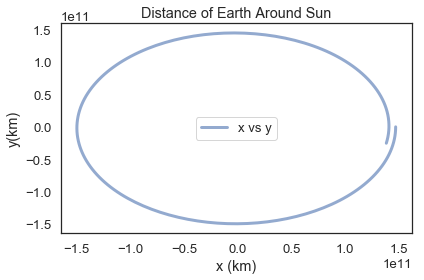

In [98]:
# And plotting

plot(results.x, results.y,label='x vs y')

decorate(xlabel='x (km)',
         ylabel='y(km)',
        title='Distance of Earth Around Sun')